In [ ]:
# Fraud Detection with 5 ML Algorithms

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.utils import resample


In [2]:
import plotly.io as pio
pio.renderers.default = 'browser'  #Forces chart to open in web browser

In [3]:
import pandas as pd
import plotly.express as px
import plotly.io as pio


In [4]:
# Load dataset
df = pd.read_csv(r"C:\Users\Saniya Firdose\Downloads\fraud_200_dataset.csv")

df.sample(n=100, random_state=42)


,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
95,TRANSFER,8457.71,8104.04,6748.94,18886.30,4427.17,0
15,CASH_OUT,4035.96,13632.27,9186.94,20447.76,42076.48,0
30,TRANSFER,5627.11,2553.79,3601.35,6955.81,48384.97,0
158,CASH_IN,2473.89,7534.78,19818.59,5711.90,23833.84,0
128,PAYMENT,8618.01,7890.44,19359.88,49436.44,20079.01,0
...,...,...,...,...,...,...,...
194,DEBIT,9448.09,11799.12,17572.58,38545.57,9461.08,0
159,TRANSFER,1029.35,14991.57,4100.04,28288.83,2218.83,0
6,TRANSFER,6988.55,4133.69,1820.04,37731.76,30520.23,0
27,CASH_OUT,2682.21,11370.41,11695.32,14396.48,3796.67,0


In [5]:
df.shape 

(200, 7)

In [6]:
print(df.isnull().sum()) 

type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64


In [7]:
# Exploring transaction type
print(df.type.value_counts()) # 0 - Cash in, 1 - Cash out, 2 - Debit, 3 - Payment, 4 - Transfer

type
DEBIT       49
CASH_IN     43
TRANSFER    37
PAYMENT     36
CASH_OUT    35
Name: count, dtype: int64


In [8]:
# Map 'type' column to numeric if not already mapped
df['type'] = df['type'].map({
    'CASH_OUT': 1,
    'PAYMENT': 2,
    'CASH_IN': 3,
    'TRANSFER': 4,
    'DEBIT': 5
})

# Drop missing values
df.dropna(inplace=True)

# Select required columns
data = df[["type", "amount", "oldbalanceOrg", "newbalanceOrig", "isFraud"]]

# Separate classes
fraud_df = data[data['isFraud'] == 1]
nonfraud_df = data[data['isFraud'] == 0]

# Oversample fraud to match non-fraud
fraud_upsampled = resample(fraud_df, 
                           replace=True, 
                           n_samples=len(nonfraud_df), 
                           random_state=42)
# Combine and shuffle
balanced_data = pd.concat([nonfraud_df, fraud_upsampled])
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

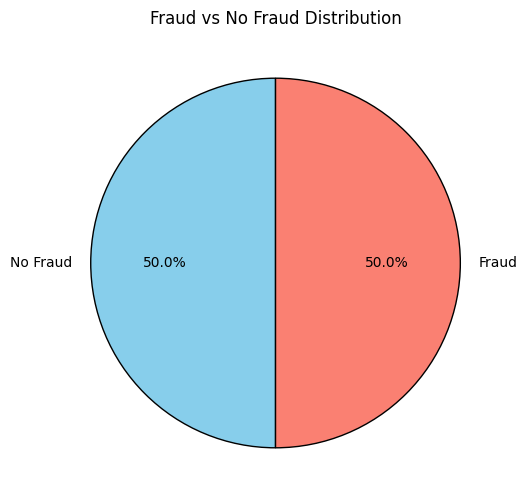

In [9]:
# Pie chart of class distribution
plt.figure(figsize=(6,6))
balanced_data['isFraud'].value_counts().plot.pie(autopct='%1.1f%%', 
                                                  labels=['No Fraud', 'Fraud'], 
                                                  startangle=90, 
                                                  colors=['skyblue', 'salmon'], 
                                                  wedgeprops={'edgecolor': 'black'})
plt.title("Fraud vs No Fraud Distribution")
plt.ylabel('')
plt.show()

In [10]:
# Prepare train/test data
X = balanced_data.drop("isFraud", axis=1)
y = balanced_data["isFraud"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC()
}

# Train and evaluate
results = {"Model": [], "Accuracy": [], "F1-Score": []}


In [11]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results["Model"].append(name)
    results["Accuracy"].append(accuracy_score(y_test, y_pred))
    results["F1-Score"].append(f1_score(y_test, y_pred))

df_results = pd.DataFrame(results)


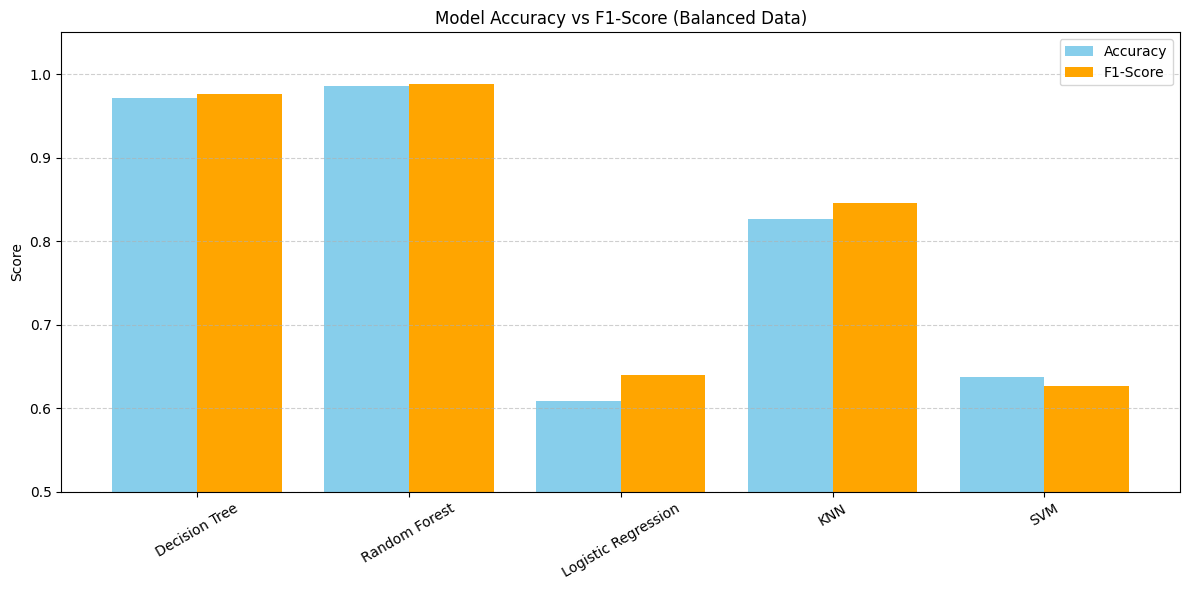

In [12]:
# Plot Accuracy and F1-Score Comparison
x = np.arange(len(df_results))
plt.figure(figsize=(12, 6))
plt.bar(x - 0.2, df_results["Accuracy"], width=0.4, label="Accuracy", color="skyblue")
plt.bar(x + 0.2, df_results["F1-Score"], width=0.4, label="F1-Score", color="orange")
plt.xticks(x, df_results["Model"], rotation=30)
plt.title("Model Accuracy vs F1-Score (Balanced Data)")
plt.ylabel("Score")
plt.ylim(0.5, 1.05)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [13]:
# Print results
print(df_results)

# Highlight best model by F1-Score
best_model = df_results.sort_values("F1-Score", ascending=False).iloc[0]

                 Model  Accuracy  F1-Score
0        Decision Tree  0.971014  0.976190
1        Random Forest  0.985507  0.987952
2  Logistic Regression  0.608696  0.640000
3                  KNN  0.826087  0.846154
4                  SVM  0.637681  0.626866


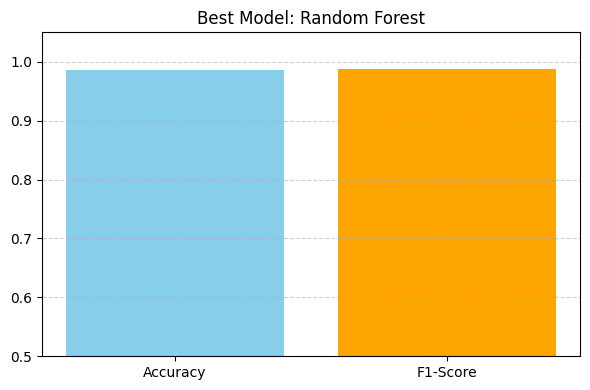

In [14]:
plt.figure(figsize=(6, 4))
plt.bar(["Accuracy", "F1-Score"], [best_model["Accuracy"], best_model["F1-Score"]], color=["skyblue", "orange"])
plt.title(f"Best Model: {best_model['Model']}")
plt.ylim(0.5, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [15]:
# import plotly.express as px

# Force chart to open in your default web browser
pio.renderers.default = 'browser'

# If you're using your actual df, make sure it has a 'type' column
# Here's a dummy example to test:
df = pd.DataFrame({
    "type": ["Credit", "Debit", "Credit", "Transfer", "Debit", "Credit"]
})

# Step 1: Prepare the data
type_counts = df["type"].value_counts().reset_index()
type_counts.columns = ['Transaction', 'Count']

# Step 2: Create the Pie Chart
fig = px.pie(type_counts,
             values='Count',
             names='Transaction',
             hole=0.5,
             title="Distribution of Transaction Type")

# Step 3: Show the figure (in browser)
fig.show()



In [16]:
# Create balanced fraud and non-fraud data
np.random.seed(42)
fraud_data = pd.DataFrame({
    "type": np.random.choice([1, 4], 250),
    "amount": np.random.uniform(6000, 10000, 250),
    "oldbalanceOrg": np.random.uniform(1000, 20000, 250),
    "newbalanceOrig": 0,
    "isFraud": 1
})
nonfraud_data = pd.DataFrame({
    "type": np.random.choice([2, 3, 5], 250),
    "amount": np.random.uniform(10, 5000, 250),
    "oldbalanceOrg": np.random.uniform(0, 20000, 250),
    "newbalanceOrig": np.random.uniform(0, 20000, 250),
    "isFraud": 0
})
data = pd.concat([fraud_data, nonfraud_data]).sample(frac=1).reset_index(drop=True)
data.head()

,type,amount,oldbalanceOrg,newbalanceOrig,isFraud
0,4,8529.223322,19051.177374,0.000000,1
1,1,7712.736593,12089.466125,0.000000,1
2,1,7000.971593,7616.853873,0.000000,1
3,1,7635.811778,8452.636857,0.000000,1
4,5,2429.044052,181.448093,9597.941632,0


In [17]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

correlation = numeric_df.corr()  

In [18]:
print(df.dtypes)
print(correlation)


type    object
dtype: object
Empty DataFrame
Columns: []
Index: []


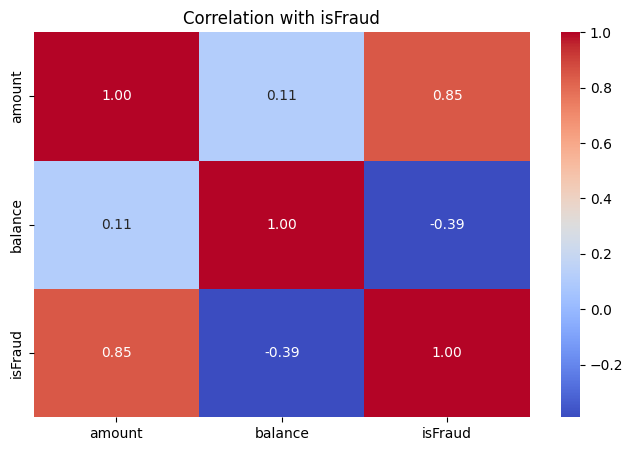

In [19]:
# Dummy data
df = pd.DataFrame({
    'amount': [100, 200, 150, 300],
    'balance': [1000, 950, 1200, 1100],
    'isFraud': [0, 1, 0, 1]
})

correlation = df.corr()

plt.figure(figsize=(8, 5))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation with isFraud")
plt.show()

In [20]:
print(data.columns)

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'isFraud'], dtype='object')


In [21]:
data["type"] = data["type"].map({"CASH_OUT": 1, "PAYMENT": 2, 
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5})

data["isFraud"] = data["isFraud"].map({0: "No Fraud", 1: "Fraud"})  # or correct name
print(data.head())

   type       amount  oldbalanceOrg  newbalanceOrig   isFraud
0   NaN  8529.223322   19051.177374        0.000000     Fraud
1   NaN  7712.736593   12089.466125        0.000000     Fraud
2   NaN  7000.971593    7616.853873        0.000000     Fraud
3   NaN  7635.811778    8452.636857        0.000000     Fraud
4   NaN  2429.044052     181.448093     9597.941632  No Fraud


In [23]:
# ✅ Corrected code
final_model_name = best_model["Model"]       # Extract model name string
final_model = models[final_model_name]       # Access the model from the models dictionary
y_final_pred = final_model.predict(X_test)
frauds_detected = np.sum(y_final_pred)

print(f"\n✅ Total Fraudulent Transactions Detected in Test Set: {frauds_detected} out of {len(y_test)}")



✅ Total Fraudulent Transactions Detected in Test Set: 42 out of 69


In [ ]:
# Save results

results_df.to_csv(r"C:\Users\Saniya Firdose\Downloads\fraud_detection_comparison.csv", index=False)
print("Results saved to Downloads folder.")
# print("Results saved to 'fraud_detection_comparison.csv'")
